C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(



Epoch 1/50


1313/1313 [==============================] - 5s 3ms/step - loss: 0.9247 - accuracy: 0.6131 - val_loss: 0.3766 - val_accuracy: 0.8754
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4929 - accuracy: 0.8043 - val_loss: 0.3139 - val_accuracy: 0.9027
Epoch 3/50
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3566 - accuracy: 0.8660 - val_loss: 0.1626 - val_accuracy: 0.9392
Epoch 4/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.8797 - val_loss: 0.1490 - val_accuracy: 0.9483
Epoch 5/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2647 - accuracy: 0.9002 - val_loss: 0.1561 - val_accuracy: 0.9422
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2650 - accuracy: 0.9117 - val_loss: 0.1705 - val_accuracy: 0.9422
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2562 - accuracy: 0.9048 - val_loss: 0.1401 - val_accura

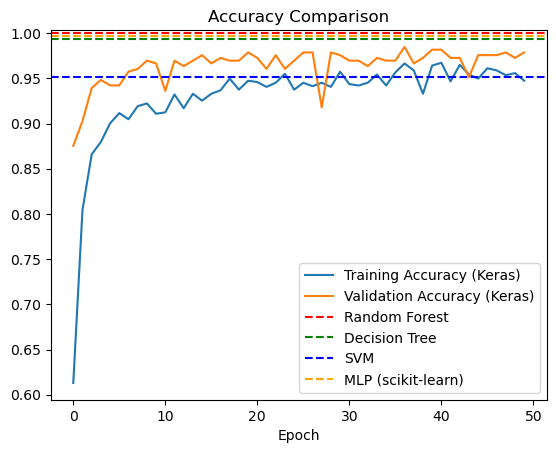

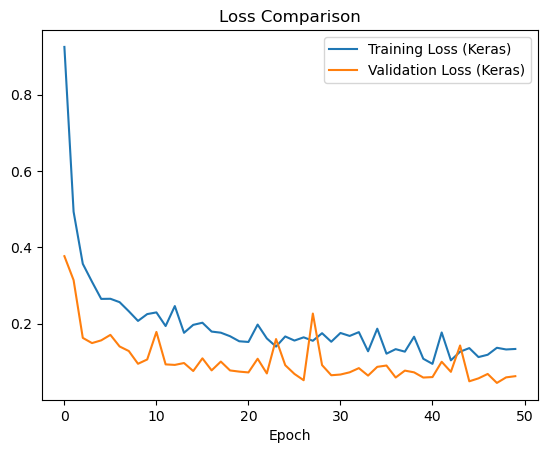

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers

# Load landmark data from CSV
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 50

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.2, random_state=42
)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)

# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)

# Create a model for landmark-based classification in Keras
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))

# Evaluate the Keras model
accuracy_keras = model.evaluate(landmarks_test, labels_test)
print(f'Keras Test Accuracy: {accuracy_keras[1]}')

# Plot training and validation accuracy for Keras model
plt.plot(history.history['accuracy'], label='Training Accuracy (Keras)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Keras)')

# Plot training and validation accuracy for scikit-learn models
plt.axhline(accuracy_score(labels_test.argmax(axis=1), rf_predictions), color='red', linestyle='--', label='Random Forest')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), dt_predictions), color='green', linestyle='--', label='Decision Tree')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), svm_predictions), color='blue', linestyle='--', label='SVM')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), mlp_predictions), color='orange', linestyle='--', label='MLP (scikit-learn)')

plt.legend()
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss for Keras model
plt.plot(history.history['loss'], label='Training Loss (Keras)')
plt.plot(history.history['val_loss'], label='Validation Loss (Keras)')
plt.legend()
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.show()


Epoch 1/10


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


1313/1313 [==============================] - 4s 3ms/step - loss: 0.9181 - accuracy: 0.6260 - val_loss: 0.3654 - val_accuracy: 0.8663
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4673 - accuracy: 0.8126 - val_loss: 0.2142 - val_accuracy: 0.9240
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8522 - val_loss: 0.1834 - val_accuracy: 0.9422
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8819 - val_loss: 0.1667 - val_accuracy: 0.9453
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2724 - accuracy: 0.8972 - val_loss: 0.1507 - val_accuracy: 0.9331
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2517 - accuracy: 0.9018 - val_loss: 0.1374 - val_accuracy: 0.9544
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9056 - val_loss: 0.1689 - val_accuracy: 0.9088
Epo

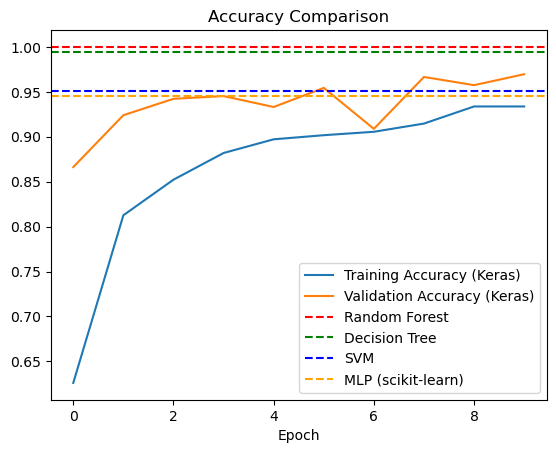

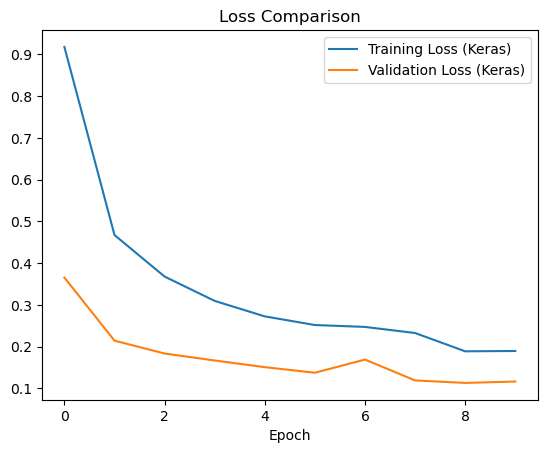

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers

# Load landmark data from CSV
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 10

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.2, random_state=42
)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)

# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)

# Create a model for landmark-based classification in Keras
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))

# Evaluate the Keras model
accuracy_keras = model.evaluate(landmarks_test, labels_test)
print(f'Keras Test Accuracy: {accuracy_keras[1]}')

# Plot training and validation accuracy for Keras model
plt.plot(history.history['accuracy'], label='Training Accuracy (Keras)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Keras)')

# Plot training and validation accuracy for scikit-learn models
plt.axhline(accuracy_score(labels_test.argmax(axis=1), rf_predictions), color='red', linestyle='--', label='Random Forest')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), dt_predictions), color='green', linestyle='--', label='Decision Tree')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), svm_predictions), color='blue', linestyle='--', label='SVM')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), mlp_predictions), color='orange', linestyle='--', label='MLP (scikit-learn)')

plt.legend()
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss for Keras model
plt.plot(history.history['loss'], label='Training Loss (Keras)')
plt.plot(history.history['val_loss'], label='Validation Loss (Keras)')
plt.legend()
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.show()


Epoch 1/10


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


132/132 [==============================] - 2s 4ms/step - loss: 1.0947 - accuracy: 0.5537 - val_loss: 0.5793 - val_accuracy: 0.8328
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7730 - val_loss: 0.3334 - val_accuracy: 0.9392
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8606 - val_loss: 0.2523 - val_accuracy: 0.9483
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8987 - val_loss: 0.2353 - val_accuracy: 0.9271
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.9124 - val_loss: 0.1665 - val_accuracy: 0.9331
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9246 - val_loss: 0.1658 - val_accuracy: 0.9544
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9132 - val_loss: 0.1173 - val_accuracy: 0.9696
Epoch 8/10
132/13

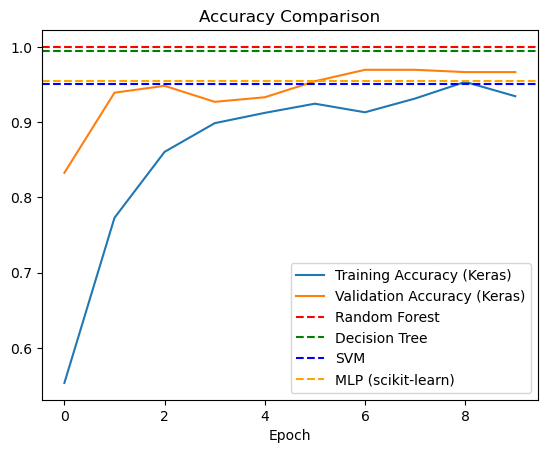

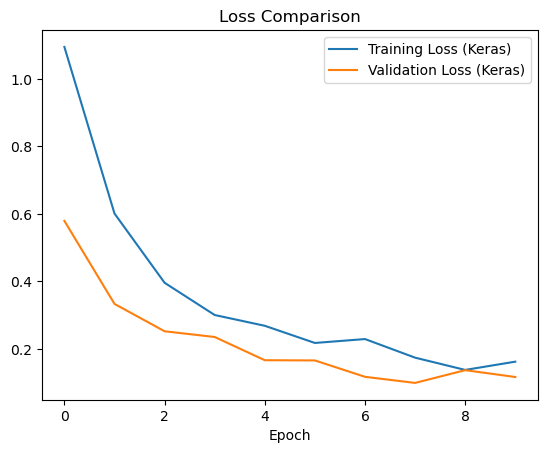

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers

# Load landmark data from CSV
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 10
epochs = 10

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.2, random_state=42
)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)

# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)

# Create a model for landmark-based classification in Keras
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(landmarks_train, labels_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(landmarks_test, labels_test))

# Evaluate the Keras model
accuracy_keras = model.evaluate(landmarks_test, labels_test)
print(f'Keras Test Accuracy: {accuracy_keras[1]}')

# Plot training and validation accuracy for Keras model
plt.plot(history.history['accuracy'], label='Training Accuracy (Keras)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Keras)')

# Plot training and validation accuracy for scikit-learn models
plt.axhline(accuracy_score(labels_test.argmax(axis=1), rf_predictions), color='red', linestyle='--', label='Random Forest')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), dt_predictions), color='green', linestyle='--', label='Decision Tree')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), svm_predictions), color='blue', linestyle='--', label='SVM')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), mlp_predictions), color='orange', linestyle='--', label='MLP (scikit-learn)')

plt.legend()
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss for Keras model
plt.plot(history.history['loss'], label='Training Loss (Keras)')
plt.plot(history.history['val_loss'], label='Validation Loss (Keras)')
plt.legend()
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.show()


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


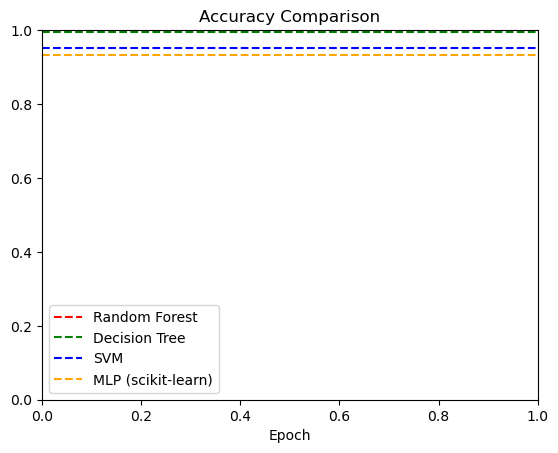

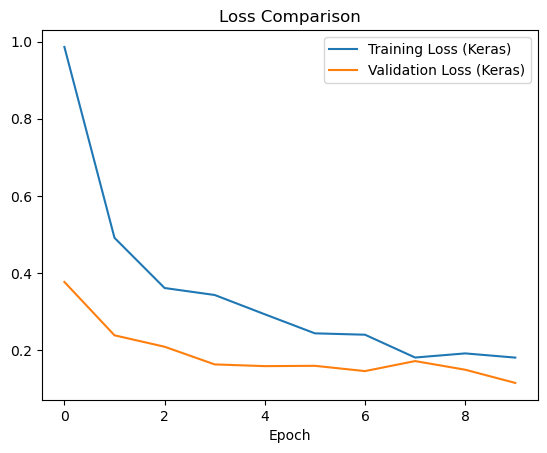

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers

# Load landmark data from CSV
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 2
epochs = 10

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.2, random_state=42
)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)

# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)

# Create a model for landmark-based classification in Keras
#model = models.Sequential()
#model.add(layers.Dense(256, activation='relu', input_shape=(num_landmarks,)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(4, activation='softmax'))

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(landmarks_train, labels_train,
#                    epochs=epochs,
#                    batch_size=batch_size,
#                    validation_data=(landmarks_test, labels_test))

# Evaluate the Keras model
#accuracy_keras = model.evaluate(landmarks_test, labels_test)
#print(f'Keras Test Accuracy: {accuracy_keras[1]}')

# Plot training and validation accuracy for Keras model
#plt.plot(history.history['accuracy'], label='Training Accuracy (Keras)')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Keras)')


# Plot training and validation accuracy for scikit-learn models
plt.axhline(accuracy_score(labels_test.argmax(axis=1), rf_predictions), color='red', linestyle='--', label='Random Forest')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), dt_predictions), color='green', linestyle='--', label='Decision Tree')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), svm_predictions), color='blue', linestyle='--', label='SVM')
plt.axhline(accuracy_score(labels_test.argmax(axis=1), mlp_predictions), color='orange', linestyle='--', label='MLP (scikit-learn)')

plt.legend()
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.show()

# Plot training and validation loss for Keras model
plt.plot(history.history['loss'], label='Training Loss (Keras)')
plt.plot(history.history['val_loss'], label='Validation Loss (Keras)')
plt.legend()
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.show()
